In [45]:
#data preparation

import pandas as pd
import numpy as np

train_path = "Dataset-Pure/train.csv/train.csv"

train = pd.read_csv(train_path,sep="|")

feature = ["location", "salary_currency", "career_level","experience_level","education_level","employment_type","job_function","job_benefits","company_process_time", "company_industry","company_size"]

train.dropna(axis=0, subset=["salary"],inplace=True)

x = train[feature]
y = train["salary"]

from sklearn.model_selection import train_test_split
x_train, x_p, y_train, y_p = train_test_split(x, y, test_size=0.3, random_state=0)
#data proccessing

def getnum(st):
    num = [int(s) for s in st.split() if s.isdigit()]
    return num[0]

x_train["experience_level"].fillna("0 tahun",inplace=True)
x_train["experience_level"] = x_train["experience_level"].apply(getnum)

x_p["experience_level"].fillna("0 tahun",inplace=True)
x_p["experience_level"] = x_p["experience_level"].apply(getnum)


def getmany(st):
    a = st.count(";")
    return a

x_train['job_benefits'].fillna("0",inplace=True)
x_train['job_benefits'] = x_train["job_benefits"].apply(getmany)

x_p['job_benefits'].fillna("0",inplace=True)
x_p['job_benefits'] = x_p["job_benefits"].apply(getmany)


def getback(st):
    num = [int(s) for s in st.split() if s.isdigit()]
    return num[-1]

x_train['company_size'].fillna("0 - 0",inplace=True)
x_train['company_size'] = x_train["company_size"].apply(getback)

x_p['company_size'].fillna("0 - 0",inplace=True)
x_p['company_size'] = x_p["company_size"].apply(getback)


x_train['company_process_time'].fillna("0 hari",inplace=True)
x_train['company_process_time'] = x_train["company_process_time"].apply(getback)

x_p['company_process_time'].fillna("0 hari",inplace=True)
x_p['company_process_time'] = x_p["company_process_time"].apply(getback)


from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories='auto',unknown_value=165,handle_unknown ="use_encoded_value")

s = (x_train.dtypes == 'object')
object_cols = list(s[s].index)

x_train[object_cols] = ordinal_encoder.fit_transform(x_train[object_cols])
x_p[object_cols] = ordinal_encoder.transform(x_p[object_cols])
x_train.fillna(0,inplace=True)
x_p.fillna(0,inplace=True)

In [46]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [47]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state = 0)

In [48]:

params = {
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(3, 10), # default 3
    "n_estimators": randint(100, 1000), # default 100
    "subsample": uniform(0.6, 1)
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [50]:
xgb.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.12236203565420874, max_depth=7, n_estimators=370, subsample=1.331993941811405; total time=   0.0s
[13:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.12236203565420874, max_depth=7, n_estimators=370, subsample=1.331993941811405; total time=   0.0s
[13:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.12236203565420874, max_depth=7, n_estimators=370, subsample=1.331993941811405; total time=   0.0s
[13:10:52] WARNING: C:/Users/Administr

C:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py", line 972, in fit


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen obje

In [51]:
xgb.best_params_

{'learning_rate': 0.07238249886045664,
 'max_depth': 6,
 'n_estimators': 921,
 'subsample': 0.6313132924555586}

In [52]:
predictions=xgb.predict(x_p)

In [53]:
predictions=xgb.predict(x_p)
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_p, predictions))
print('MSE:', metrics.mean_squared_error(y_p, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_p, predictions)))

MAE: 1750150.000327912
MSE: 17110235566426.137
RMSE: 4136452.0505411564


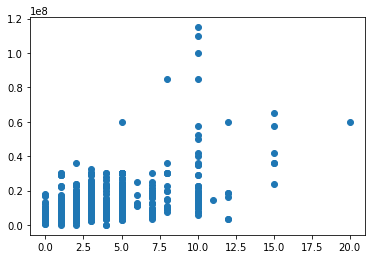

In [54]:
import matplotlib.pyplot as plt
plt.scatter(x=x_train["experience_level"],y=y_train)

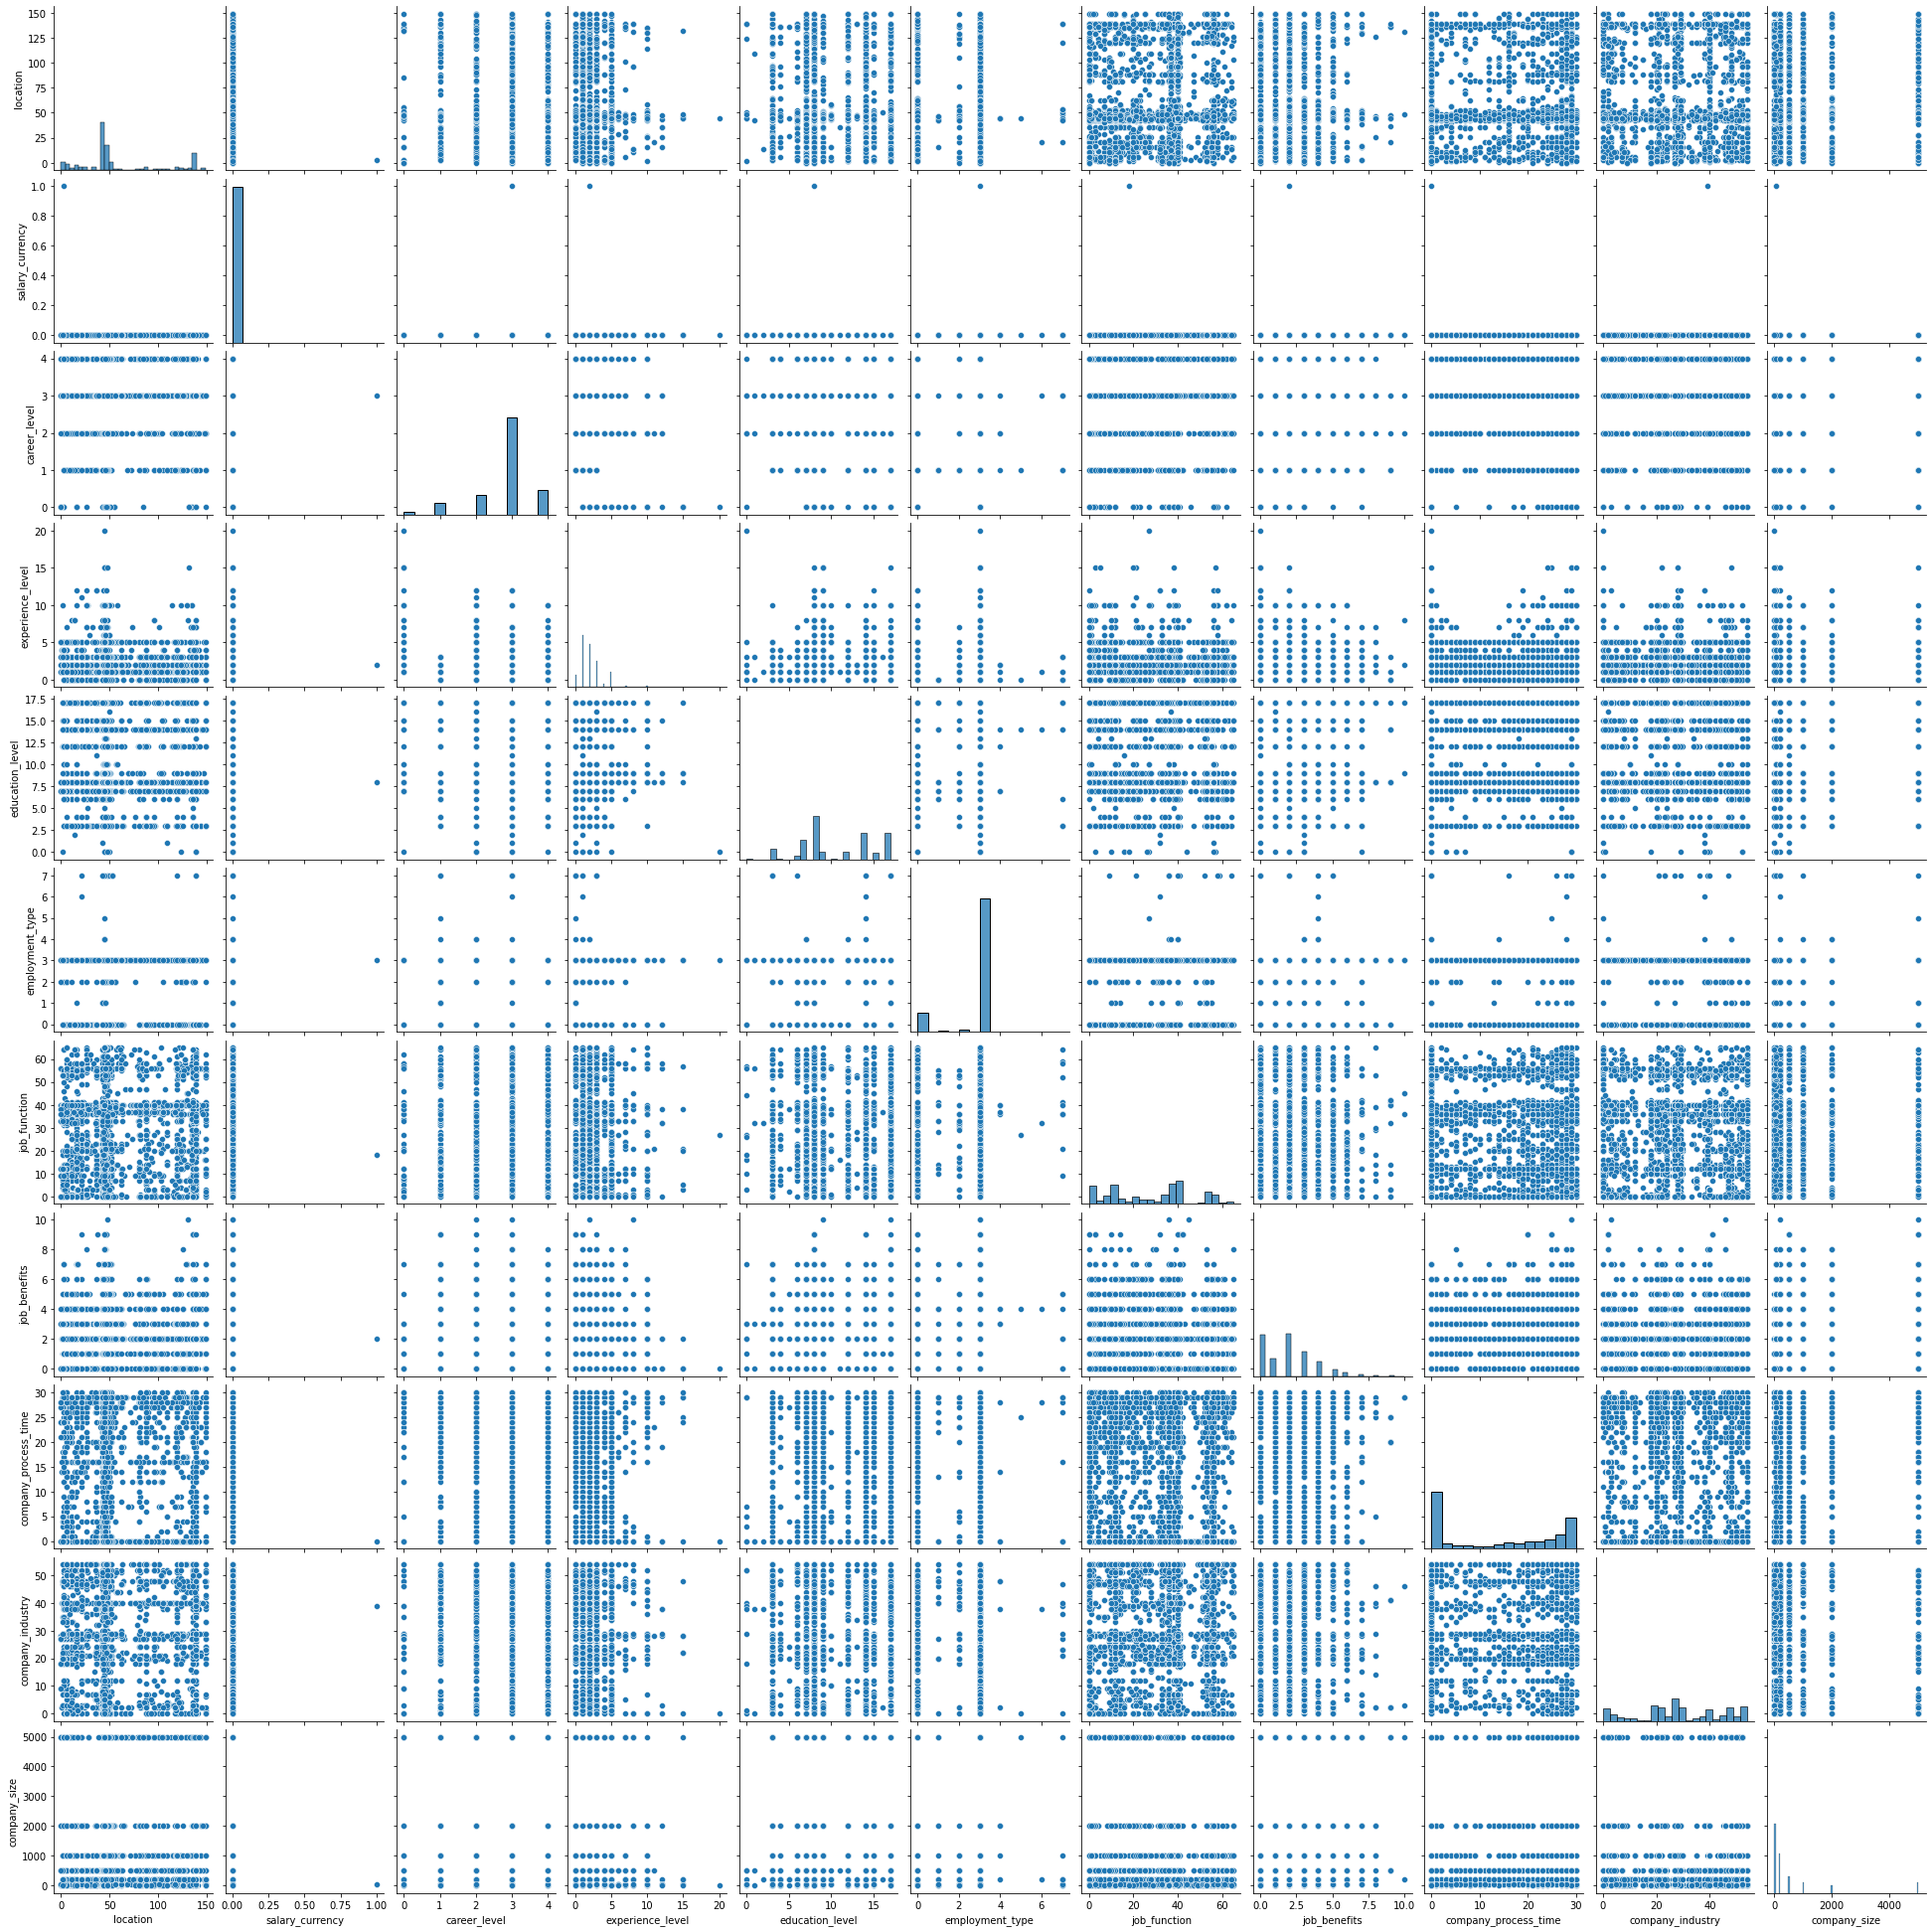

In [55]:
import seaborn as sns
sns.pairplot(x_train)

In [56]:
#data preparation
import pandas as pd

train_path = "Dataset-Pure/train.csv/train.csv"

train = pd.read_csv(train_path, sep = '|')

trainC = train.dropna(axis=0,subset=["salary"])

x_cols_used = ["location","salary_currency","career_level","experience_level","education_level","employment_type","job_function","company_industry","company_size"]

x = trainC[x_cols_used]
y = trainC["salary"]

from sklearn.model_selection import train_test_split
x_train, x_predict, y_train, y_predict = train_test_split(x, y, test_size=0.3, random_state=0)

#data proccessing
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories='auto',unknown_value=165,handle_unknown ="use_encoded_value")
#because all column used are object, we dont need :
# s = (x_train.dtypes == 'object')
# object_cols = list(s[s].index)

x_train[x_cols_used] = ordinal_encoder.fit_transform(x_train[x_cols_used])
x_predict[x_cols_used] = ordinal_encoder.transform(x_predict[x_cols_used])

x_train.fillna(0,inplace=True)
x_predict.fillna(0,inplace=True)

#make model

In [57]:
import xgboost as xgb
from scipy.stats import uniform, randint

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state = 0)


params = {
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(3, 10), # default 3
    "n_estimators": randint(100, 1000), # default 100
    "subsample": uniform(0.6, 1)
}

from sklearn.model_selection import RandomizedSearchCV

xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 1)

xgb.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.12236203565420874, max_depth=7, n_estimators=370, subsample=1.331993941811405; total time=   0.0s
[13:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.12236203565420874, max_depth=7, n_estimators=370, subsample=1.331993941811405; total time=   0.0s
[13:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.12236203565420874, max_depth=7, n_estimators=370, subsample=1.331993941811405; total time=   0.0s
[13:12:11] WARNING: C:/Users/Administr

C:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py", line 972, in fit


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen obje

In [58]:
import xgboost as xgb
from scipy.stats import uniform, randint

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state = 0)


params = {
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(3, 10), # default 3
    "n_estimators": randint(100, 1000), # default 100
    "subsample": uniform(0.6, 1)
}

from sklearn.model_selection import RandomizedSearchCV

xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 1)

xgb.fit(x_train, y_train)

predictions=xgb.predict(x_predict)
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_predict, predictions))
print('MSE:', metrics.mean_squared_error(y_predict, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_predict, predictions)))

MAE: 1931062.96930745
MSE: 20588941541832.363
RMSE: 4537503.8889054805


In [77]:
df = pd.read_csv(train_path,sep="|")

df.dropna(axis=0,subset=["salary"],inplace=True)

In [78]:
df.describe(include= 'O')

,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
count,6352,6352,6352,6352,5819,6352,6352,6352,4819,4204,5408,6160,6352
unique,4316,164,2,5,14,18,8,67,1278,30,7,57,5462
top,Sales Executive,Jakarta Raya,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Asuransi kesehatan;Waktu regular, Senin - Juma...",29 days,1- 50 pekerja,Manufaktur/Produksi,Kualifikasi:Berpenampilan Menarik & RapihBisa ...
freq,111,1223,6350,3913,2095,1800,5424,718,345,722,1891,491,24


In [84]:
# def getmany(st):
#     a = st.count(",")
#     return a

# df['education_level'].fillna("0",inplace=True)
# df['education_level'] = df["education_level"].apply(getmany)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

df[["employment_type"]] = ordinal_encoder.fit_transform(df[["employment_type"]])
df.fillna(0,inplace=True)


In [80]:
df

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5,6,KEPALA PABRIK,Balikpapan,IDR,Supervisor/Koordinator,0,14.0,Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3 tahun,14.0,Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0
18,19,Accounting Staff,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,7.0,Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,0,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0
22,23,Senior Staff Purchasing,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,14.0,Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29 days,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2 tahun,17.0,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31719,31720,Sales - Bandung,Bandung,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,7.0,Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,20 days,1- 50 pekerja,Retail/Merchandise,Tanggung Jawab :Menjaga dan meningkatkan volum...,5100000.0
31720,31721,CREW OUTLET,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),0,3.0,Penuh Waktu,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",0,0,0,Makanan & Minuman/Katering/Restoran,PT . Waroeng Steak Indonesia membuka lowongan ...,2400000.0
31729,31730,Flutter Developer Programmer,Aceh,IDR,Pegawai (non-manajemen & non-supervisor),5 tahun,7.0,Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",0,0,1- 50 pekerja,Makanan & Minuman/Katering/Restoran,Flutter Developer1. Menguasai SDK Flutter dan ...,7700000.0
31732,31733,Area Business Development Associate - Madiun,Madiun,IDR,Supervisor/Koordinator,1 tahun,7.0,Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Kasual (contoh: Kaos),21 days,51 - 200 pekerja,Komputer/Teknik Informatika (Perangkat Keras),SummaryAs an Area Business Development Associa...,8000000.0


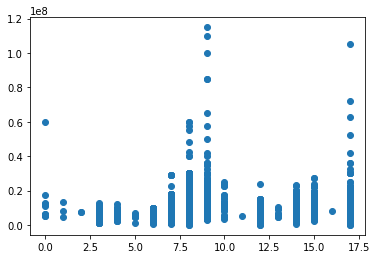

In [81]:
plt.scatter(x=df["education_level"],y=df["salary"])

In [72]:
df.groupby("education_level").count()

,id,job_title,location,salary_currency,career_level,experience_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
education_level,,,,,,,,,,,,,,
"Diploma Pascasarjana, Gelar Professional, Magister (S2)",11,11,11,11,11,10,11,11,10,8,10,10,11,11
"Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)",3,3,3,3,3,2,3,3,2,0,2,2,3,3
Doktor (S3),2,2,2,2,2,2,2,2,2,0,2,2,2,2
"SMA, SMU/SMK/STM",421,421,421,421,421,323,421,421,274,232,290,409,421,421
"SMA, SMU/SMK/STM, Sarjana (S1)",53,53,53,53,53,42,53,53,37,23,38,52,53,53
"SMA, SMU/SMK/STM, Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)",9,9,9,9,9,7,9,9,7,7,7,9,9,9
"SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma)",141,141,141,141,141,123,141,141,111,77,115,140,141,141
"SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)",784,784,784,784,784,706,784,784,552,482,687,772,784,784
Sarjana (S1),1800,1800,1800,1800,1800,1686,1800,1800,1497,1341,1621,1744,1800,1800


In [73]:
df.groupby("job_function").count()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_benefits,company_process_time,company_size,company_industry,job_description,salary
job_function,,,,,,,,,,,,,,
"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",458,458,458,458,458,435,458,458,331,273,377,441,458,458
"Akuntansi / Keuangan,Audit & Pajak",123,123,123,123,123,121,123,123,98,81,104,117,123,123
"Akuntansi / Keuangan,Keuangan / Investasi Perusahaan",24,24,24,24,24,21,24,24,19,17,19,20,24,24
"Akuntansi / Keuangan,Perbankan / Jasa Finansial",123,123,123,123,123,79,123,123,108,103,115,123,123,123
"Bangunan/Konstruksi,Arsitek/Desain Interior",89,89,89,89,89,84,89,89,66,43,71,85,89,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Teknik,Teknik Elektronika",20,20,20,20,20,16,20,20,19,18,19,20,20,20
"Teknik,Teknik Industri",17,17,17,17,17,17,17,17,14,10,17,17,17,17
"Teknik,Teknik Kimia",5,5,5,5,5,5,5,5,5,4,5,5,5,5


In [82]:
df.groupby("job_title").count()

,id,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
job_title,,,,,,,,,,,,,,
(JV2201011) Marcomm Staff,1,1,1,1,1,1,1,1,1,1,1,1,1,1
(Motion) Graphic Designer,1,1,1,1,1,1,1,1,1,1,1,1,1,1
.NET CORE Web Developer,1,1,1,1,1,1,1,1,1,1,1,1,1,1
.NET Developer,2,2,2,2,2,2,2,2,2,2,2,2,2,2
.NET Programmer,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
管理培训生 Restaurant Management Trainee (Grand Indonesia Mall),1,1,1,1,1,1,1,1,1,1,1,1,1,1
"管理培训生 Restaurant Management Trainee (Mall Of Indonesia, Kelapa Gading)",1,1,1,1,1,1,1,1,1,1,1,1,1,1
融资经理,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [85]:
df.groupby("employment_type").count()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
employment_type,,,,,,,,,,,,,,
0.0,818,818,818,818,818,818,818,818,818,818,818,818,818,818
1.0,26,26,26,26,26,26,26,26,26,26,26,26,26,26
2.0,59,59,59,59,59,59,59,59,59,59,59,59,59,59
3.0,5424,5424,5424,5424,5424,5424,5424,5424,5424,5424,5424,5424,5424,5424
4.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7.0,18,18,18,18,18,18,18,18,18,18,18,18,18,18


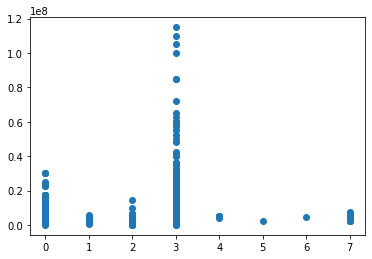

In [86]:
plt.scatter(x=df["employment_type"],y=df["salary"])

In [87]:
df.groupby("career_level").count()

,id,job_title,location,salary_currency,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
career_level,,,,,,,,,,,,,,
CEO/GM/Direktur/Manajer Senior,109,109,109,109,109,109,109,109,109,109,109,109,109,109
Lulusan baru/Pengalaman kerja kurang dari 1 tahun,467,467,467,467,467,467,467,467,467,467,467,467,467,467
Manajer/Asisten Manajer,807,807,807,807,807,807,807,807,807,807,807,807,807,807
Pegawai (non-manajemen & non-supervisor),3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913
Supervisor/Koordinator,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056


In [89]:
import pandas as pd

train_path = "Dataset-Pure/train.csv/train.csv"

df = pd.read_csv(train_path,sep="|")

In [90]:
df.describe(include = "O")

,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
count,31746,31746,31742,31746,27454,31746,30402,31746,25079,22602,26583,30232,31745
unique,19260,199,2,6,20,21,9,68,2978,30,7,58,26981
top,Sales Executive,Jakarta Raya,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Asuransi kesehatan;Waktu regular, Senin - Juma...",29 days,51 - 200 pekerja,Manufaktur/Produksi,Lowongan ini akan mengarahkan anda langsung ke...
freq,273,7551,31731,17566,9766,10340,25940,3428,2000,4231,6931,2775,60
